# Stellar Classification of Stars

In this project, we process a messy dataset and make it ready for classification. We then classify the given stars into dwarfs and giants.

We import raw dataset from Kaggle, clean it by removing unnecessary columns, handle missing data, encode data, balance and downsample data.

Below is the link of dataset from kaggle


https://www.kaggle.com/vinesmsuic/star-categorization-giants-and-dwarfs

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
# Use pd.read_csv to read file
path = "Star99999_raw.csv"
raw_data = pd.read_csv(path)

raw_data

,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
0,0,9.10,3.54,1.39,0.482,F5
1,1,9.27,21.90,3.10,0.999,K3V
2,2,6.61,2.81,0.63,-0.019,B9
3,3,8.06,7.75,0.97,0.370,F0V
4,4,8.55,2.87,1.11,0.902,G8III
...,...,...,...,...,...,...
99994,99994,8.72,3.07,0.87,0.097,B3
99995,99995,9.25,,,0.131,A1V
99996,99996,8.08,1.07,0.68,1.094,G5
99997,99997,6.98,2.97,0.76,-0.143,B1.5V


In [3]:
raw_data.columns

Index(['Unnamed: 0', 'Vmag', 'Plx', 'e_Plx', 'B-V', 'SpType'], dtype='object')

* `Vmag` - Visual Apparent Magnitude of the Star 
* `Plx` - Distance Between the Star and the Earth 
* `e_Plx` - Standard Error of `Plx` 
* `B-V` - B-V color index. 
    * Hot star has a B-V color index ~ 0 or negative, 
    * Cool star has a B-V color index ~ to 2.0
    * Other stars : 0 - 2.0
* `SpType` -  [Stellar classification.](https://en.wikipedia.org/wiki/Stellar_classification) (Roman Numerals &gt;IV are giants. Otherwise are dwarfs) 


In [4]:
# Check the DataType of our dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  99999 non-null  int64 
 1   Vmag        99999 non-null  object
 2   Plx         99999 non-null  object
 3   e_Plx       99999 non-null  object
 4   B-V         99999 non-null  object
 5   SpType      97377 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [5]:
# Convert Columns data type to float values
raw_data["Vmag"] = pd.to_numeric(raw_data["Vmag"], downcast="float", errors='coerce')
raw_data["Plx"] = pd.to_numeric(raw_data["Plx"], downcast="float", errors='coerce')
raw_data["e_Plx"] = pd.to_numeric(raw_data["e_Plx"], downcast="float", errors='coerce')
raw_data["B-V"] = pd.to_numeric(raw_data["B-V"], downcast="float", errors='coerce')

We are converting objects to float value and 'coerce' is used to convert bad non-numeric values to NaN

In [6]:
raw_data = raw_data.drop('Unnamed: 0', axis=1)

In [7]:
# Check the DataType of our dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vmag    99998 non-null  float32
 1   Plx     99768 non-null  float32
 2   e_Plx   99768 non-null  float32
 3   B-V     98871 non-null  float32
 4   SpType  97377 non-null  object 
dtypes: float32(4), object(1)
memory usage: 2.3+ MB


## Handling Missing data


In [8]:
# get the number of missing data points per column
missing_values_count = raw_data.isnull().sum()

missing_values_count

Vmag         1
Plx        231
e_Plx      231
B-V       1128
SpType    2622
dtype: int64

In [9]:
# how many total missing values do we have?
total_cells = np.product(raw_data.shape)
total_missing = missing_values_count.sum()

# percentage of data that is missing
percent_missing = (total_missing/total_cells)
print("Percentage Missing:", "{:.2%}".format(percent_missing))

Percentage Missing: 0.84%


From the percentage of missing data, since it is so small (only 0.84%), we can just drop the rows.

Let's see what will happen if we remove all the rows that contain a missing value.

## Dropping Missing Data

In [10]:
# remove all the rows that contain a missing value
# better to store it into a new variable to avoid confusion
raw_data_na_dropped = raw_data.dropna() 

raw_data_na_dropped

,Vmag,Plx,e_Plx,B-V,SpType
0,9.10,3.54,1.39,0.482,F5
1,9.27,21.90,3.10,0.999,K3V
2,6.61,2.81,0.63,-0.019,B9
3,8.06,7.75,0.97,0.370,F0V
4,8.55,2.87,1.11,0.902,G8III
...,...,...,...,...,...
99993,7.92,3.93,1.24,0.133,Am...
99994,8.72,3.07,0.87,0.097,B3
99996,8.08,1.07,0.68,1.094,G5
99997,6.98,2.97,0.76,-0.143,B1.5V


In [11]:
# just how much rows did we drop?
dropped_rows_count = raw_data.shape[0]-raw_data_na_dropped.shape[0]
print("Rows we dropped from original dataset: %d \n" % dropped_rows_count)

# Percentage we dropped
percent_dropped = dropped_rows_count/raw_data.shape[0]
print("Percentage Loss:", "{:.2%}".format(percent_dropped))

Rows we dropped from original dataset: 3257 

Percentage Loss: 3.26%


Lastly, read the statistics and info again.

In [12]:
raw_data_na_dropped.describe()

,Vmag,Plx,e_Plx,B-V
count,96742.000000,96742.000000,96742.000000,96742.000000
mean,8.291918,7.105242,1.264163,0.700663
std,1.247995,11.145643,1.156202,0.490053
min,-1.440000,-35.099998,0.380000,-0.400000
25%,7.610000,2.520000,0.870000,0.342000
50%,8.400000,4.600000,1.080000,0.605000
75%,9.070000,8.270000,1.360000,1.072000
max,13.610000,772.330017,69.070000,5.460000


In [13]:
raw_data_na_dropped_reindex = raw_data_na_dropped.reset_index(drop=True)

In [14]:
raw_data_na_dropped_reindex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96742 entries, 0 to 96741
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vmag    96742 non-null  float32
 1   Plx     96742 non-null  float32
 2   e_Plx   96742 non-null  float32
 3   B-V     96742 non-null  float32
 4   SpType  96742 non-null  object 
dtypes: float32(4), object(1)
memory usage: 2.2+ MB


Looks like we have finally cleaned out all the missing values!

Finally, we can save our progress to a csv file.
* Remember to use `index=False` if you don't want to create separate column of indexes again!

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
https://stackoverflow.com/questions/20845213/how-to-avoid-python-pandas-creating-an-index-in-a-saved-csv

# Appending New Column for Absolute Magnitude(AbsMag)

## Finding Absolute Magnitude

The absolute magnitude of the stars were generated via the equation:
![](https://i.imgur.com/tt1h8bu.png)
Where $M$ represents the absolute magnitude `Amag`, 
$m$ represents the visual apparent magnitude `Vmag`
and $p$ represents stellar parallax `Plx`.


In this session, we will create a new column `Amag` to store $M$.

Things need to be aware:
* Taking log of 0 would result in a infinity, which is what we dont want to see
  * To fix this: Dropping rows with `Plx` = 0
* Taking log of -ve numbers would result complex numbers, which is what we dont want to see too.
  * To fix this: Taking Absolute value of `Plx`


In [15]:
df = raw_data_na_dropped_reindex.copy()
df

,Vmag,Plx,e_Plx,B-V,SpType
0,9.10,3.54,1.39,0.482,F5
1,9.27,21.90,3.10,0.999,K3V
2,6.61,2.81,0.63,-0.019,B9
3,8.06,7.75,0.97,0.370,F0V
4,8.55,2.87,1.11,0.902,G8III
...,...,...,...,...,...
96737,7.92,3.93,1.24,0.133,Am...
96738,8.72,3.07,0.87,0.097,B3
96739,8.08,1.07,0.68,1.094,G5
96740,6.98,2.97,0.76,-0.143,B1.5V


In [16]:
#Dropping rows that `Plx` = 0
df = df[df.Plx != 0]

#Reindex the dataframe
df = df.reset_index(drop=True)

df

,Vmag,Plx,e_Plx,B-V,SpType
0,9.10,3.54,1.39,0.482,F5
1,9.27,21.90,3.10,0.999,K3V
2,6.61,2.81,0.63,-0.019,B9
3,8.06,7.75,0.97,0.370,F0V
4,8.55,2.87,1.11,0.902,G8III
...,...,...,...,...,...
96702,7.92,3.93,1.24,0.133,Am...
96703,8.72,3.07,0.87,0.097,B3
96704,8.08,1.07,0.68,1.094,G5
96705,6.98,2.97,0.76,-0.143,B1.5V


Looks like we successfully dropped all the rows that `Plx` = 0.

In [17]:
#Implement the equation
df["Amag"] = df["Vmag"] + 5* (np.log10(abs(df["Plx"]))+1)

df

,Vmag,Plx,e_Plx,B-V,SpType,Amag
0,9.10,3.54,1.39,0.482,F5,16.845016
1,9.27,21.90,3.10,0.999,K3V,20.972221
2,6.61,2.81,0.63,-0.019,B9,13.853531
3,8.06,7.75,0.97,0.370,F0V,17.506508
4,8.55,2.87,1.11,0.902,G8III,15.839410
...,...,...,...,...,...,...
96702,7.92,3.93,1.24,0.133,Am...,15.891963
96703,8.72,3.07,0.87,0.097,B3,16.155693
96704,8.08,1.07,0.68,1.094,G5,13.226919
96705,6.98,2.97,0.76,-0.143,B1.5V,14.343782


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96707 entries, 0 to 96706
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vmag    96707 non-null  float32
 1   Plx     96707 non-null  float32
 2   e_Plx   96707 non-null  float32
 3   B-V     96707 non-null  float32
 4   SpType  96707 non-null  object 
 5   Amag    96707 non-null  float32
dtypes: float32(5), object(1)
memory usage: 2.6+ MB


In [19]:
df.describe()

,Vmag,Plx,e_Plx,B-V,Amag
count,96707.000000,96707.000000,96707.000000,96707.000000,96707.000000
mean,8.291762,7.107813,1.264152,0.700663,16.480989
std,1.247954,11.146737,1.156387,0.490001,2.451171
min,-1.440000,-35.099998,0.380000,-0.400000,-0.350000
25%,7.610000,2.520000,0.870000,0.342000,15.157670
50%,8.400000,4.600000,1.080000,0.605000,16.447716
75%,9.070000,8.270000,1.360000,1.072000,18.016191
max,13.610000,772.330017,69.070000,5.460000,30.449015


# Column Mapping

In this session, we will create a new column `TargetClass` to store whether it is a Giant or Dwarf.

## Convert SpType into Giants and Dwarf

* Roman Numerals >IV are giants. Otherwise are dwarfs



In [20]:
# Take a look at our SpType column
df['SpType']

0              F5
1             K3V
2              B9
3             F0V
4           G8III
           ...   
96702       Am...
96703          B3
96704          G5
96705       B1.5V
96706    K5/M0III
Name: SpType, Length: 96707, dtype: object

In [21]:
#Copy the SpType column to a new column called TargetClass
df['TargetClass'] = df['SpType']

df

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,9.10,3.54,1.39,0.482,F5,16.845016,F5
1,9.27,21.90,3.10,0.999,K3V,20.972221,K3V
2,6.61,2.81,0.63,-0.019,B9,13.853531,B9
3,8.06,7.75,0.97,0.370,F0V,17.506508,F0V
4,8.55,2.87,1.11,0.902,G8III,15.839410,G8III
...,...,...,...,...,...,...,...
96702,7.92,3.93,1.24,0.133,Am...,15.891963,Am...
96703,8.72,3.07,0.87,0.097,B3,16.155693,B3
96704,8.08,1.07,0.68,1.094,G5,13.226919,G5
96705,6.98,2.97,0.76,-0.143,B1.5V,14.343782,B1.5V


In [22]:
#The intuitive approach (Could take a long time if you have a huge dataset)
for i in range(len(df['TargetClass'])):
    if "V" in df.loc[i,'TargetClass']: 
        if "VII" in df.loc[i,'TargetClass']: 
            df.loc[i,'TargetClass'] = 0 # VII is Dwarf
        else:
            df.loc[i,'TargetClass'] = 1 # IV, V, VI are Giants
    elif "I" in df.loc[i,'TargetClass']: 
        df.loc[i,'TargetClass'] = 0 # I, II, III are Dwarfs
    else: 
        df.loc[i,'TargetClass'] = 9 # None
        
df['TargetClass']

0        9
1        1
2        9
3        1
4        0
        ..
96702    9
96703    9
96704    9
96705    1
96706    0
Name: TargetClass, Length: 96707, dtype: object

When we use the data to analysis, the label is better in numeric values otherwise we might need to map them.

In [23]:
df.describe(include='all')

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
count,96707.000000,96707.000000,96707.000000,96707.000000,96707,96707.000000,96707.0
unique,NaN,NaN,NaN,NaN,3703,NaN,3.0
top,NaN,NaN,NaN,NaN,K0,NaN,9.0
freq,NaN,NaN,NaN,NaN,7321,NaN,49210.0
mean,8.291762,7.107813,1.264152,0.700663,NaN,16.480989,NaN
std,1.247954,11.146737,1.156387,0.490001,NaN,2.451171,NaN
min,-1.440000,-35.099998,0.380000,-0.400000,NaN,-0.350000,NaN
25%,7.610000,2.520000,0.870000,0.342000,NaN,15.157670,NaN
50%,8.400000,4.600000,1.080000,0.605000,NaN,16.447716,NaN
75%,9.070000,8.270000,1.360000,1.072000,NaN,18.016191,NaN


# Balancing Data

Balanced Dataset is a dataset where each output class (or target class) is represented by the same number of input samples.

In [24]:
df['TargetClass'].value_counts()

9    49210
1    27721
0    19776
Name: TargetClass, dtype: int64

D:\Astro-Pro\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TargetClass', ylabel='count'>

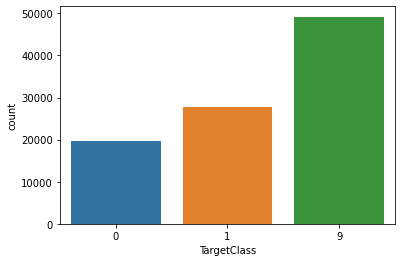

In [25]:
import matplotlib.pyplot as plt # plot graphs
import seaborn as sns # plot graphs

sns.countplot(df['TargetClass'])

We only need the Dwarfs and Giants Record.

In [26]:
#Dropping rows that `TargetClass` = 9
df = df[df.TargetClass != 9] 

#Reindex the dataframe
df = df.reset_index(drop=True)

df

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,9.27,21.900000,3.10,0.999,K3V,20.972221,1
1,8.06,7.750000,0.97,0.370,F0V,17.506508,1
2,8.55,2.870000,1.11,0.902,G8III,15.839410,0
3,12.31,18.799999,4.99,1.336,M0V:,23.680790,1
4,8.59,10.760000,1.10,0.489,F6V,18.749062,1
...,...,...,...,...,...,...,...
47492,8.79,0.890000,1.28,1.194,K1III,13.536950,0
47493,8.00,0.410000,0.92,0.854,F6Iab,11.063919,0
47494,7.69,6.600000,0.92,1.110,K2III,16.787720,0
47495,6.98,2.970000,0.76,-0.143,B1.5V,14.343782,1


Since we have so many records, we will just downsample the majority class.

In [27]:
# Separate the labels
df_giants = df[df.TargetClass == 1]
df_dwarfs = df[df.TargetClass == 0]

In [28]:
# Numbers of rows of Giants and Dwarfs
num_of_giant = df_giants.shape[0]
num_of_dwarf = df_dwarfs.shape[0]
print("Giants(1):",num_of_giant)
print("Dwarfs(0):",num_of_dwarf)

Giants(1): 27721
Dwarfs(0): 19776


To downsample the class, we can just use a loop to loop through the records, but there is a way better approach.

Let's import `resample` from `sklearn`.

In [29]:
from sklearn.utils import resample

In [30]:
# Downsample majority class
df_giants_downsampled = resample(df_giants, 
                                 replace=False,    # sample without replacement
                                 n_samples=num_of_dwarf,     # to match minority class
                                 random_state=1) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_giants_downsampled, df_dwarfs])

In [31]:
df_downsampled['TargetClass'].value_counts()

1    19776
0    19776
Name: TargetClass, dtype: int64

D:\Astro-Pro\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TargetClass', ylabel='count'>

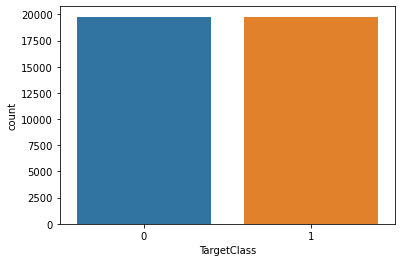

In [32]:
sns.countplot(df_downsampled['TargetClass'])

 Last but not Least, we need to check our dataset to see whether there are still some problem.

In [33]:
df_downsampled.describe(include='all')

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
count,39552.000000,39552.000000,39552.000000,39552.000000,39552,39552.000000,39552.0
unique,NaN,NaN,NaN,NaN,2576,NaN,2.0
top,NaN,NaN,NaN,NaN,K0III,NaN,1.0
freq,NaN,NaN,NaN,NaN,2841,NaN,19776.0
mean,7.921288,7.117379,1.109707,0.744332,NaN,16.050629,NaN
std,1.308845,12.446209,0.788118,0.513990,NaN,2.443930,NaN
min,-0.620000,-27.840000,0.420000,-0.400000,NaN,-0.350000,NaN
25%,7.210000,2.430000,0.800000,0.358000,NaN,14.756515,NaN
50%,8.160000,4.440000,0.990000,0.703000,NaN,16.020827,NaN
75%,8.830000,8.232500,1.230000,1.129000,NaN,17.590542,NaN


In [34]:
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39552 entries, 3300 to 47496
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         39552 non-null  float32
 1   Plx          39552 non-null  float32
 2   e_Plx        39552 non-null  float32
 3   B-V          39552 non-null  float32
 4   SpType       39552 non-null  object 
 5   Amag         39552 non-null  float32
 6   TargetClass  39552 non-null  object 
dtypes: float32(5), object(2)
memory usage: 1.7+ MB


Yeah, Reindex.

In [35]:
df_balanced = df_downsampled.reset_index(drop=True)

df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39552 entries, 0 to 39551
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         39552 non-null  float32
 1   Plx          39552 non-null  float32
 2   e_Plx        39552 non-null  float32
 3   B-V          39552 non-null  float32
 4   SpType       39552 non-null  object 
 5   Amag         39552 non-null  float32
 6   TargetClass  39552 non-null  object 
dtypes: float32(5), object(2)
memory usage: 1.4+ MB


In [36]:
df_balanced

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,9.03,3.650000,1.01,1.146,K2III/IVCN.,16.841465,1
1,7.88,31.879999,0.98,0.716,G8V,20.397591,1
2,9.29,5.160000,1.35,0.400,F0V,17.853249,1
3,7.51,12.850000,0.84,0.541,F7V,18.054516,1
4,9.10,6.190000,3.26,0.484,F3:V+...,18.058453,1
...,...,...,...,...,...,...,...
39547,8.05,6.240000,1.17,1.157,K2III,17.025925,0
39548,8.79,0.890000,1.28,1.194,K1III,13.536950,0
39549,8.00,0.410000,0.92,0.854,F6Iab,11.063919,0
39550,7.69,6.600000,0.92,1.110,K2III,16.787720,0


In [37]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

df_balanced

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,8.41,5.50,1.06,1.086,K1III,17.111813,0
1,7.76,4.72,0.96,1.119,K1III,16.129711,0
2,8.59,3.94,1.12,1.053,K1III,16.567482,0
3,8.72,7.94,1.13,0.569,F8Vw...,18.219103,1
4,5.64,11.15,0.70,1.121,K0III,15.876373,0
...,...,...,...,...,...,...,...
39547,7.49,5.42,1.02,0.116,A2Vs,16.159996,1
39548,9.41,5.54,1.58,0.496,F3V,18.127548,1
39549,8.52,2.71,1.39,1.083,K0III,15.684847,0
39550,8.42,7.39,3.96,0.300,A9V,17.763222,1


Finally done!

In [38]:
#Save our dataset, we can finally play with it!!!
df_balanced.to_csv("Star39552_balanced.csv", index=False)

# Classification

### We use three models here: Logistic Regression, RandomForest, XGBoost Classifier. The hyper parameters are also tuned to get hugher accuracy


In [39]:
#importing required files

import pandas as pd
import numpy as np
import math
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


Vmag              AxesSubplot(0.125,0.799681;0.133621x0.0803191)
Plx            AxesSubplot(0.285345,0.799681;0.133621x0.0803191)
e_Plx           AxesSubplot(0.44569,0.799681;0.133621x0.0803191)
B-V            AxesSubplot(0.606034,0.799681;0.133621x0.0803191)
Amag           AxesSubplot(0.766379,0.799681;0.133621x0.0803191)
TargetClass       AxesSubplot(0.125,0.703298;0.133621x0.0803191)
dtype: object

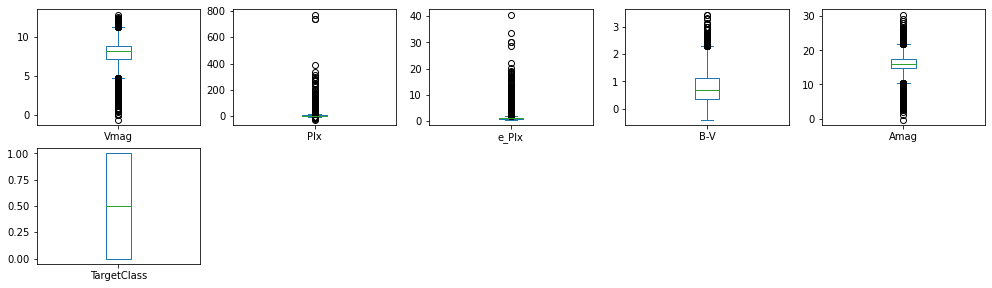

In [40]:
#Outliers plotting

star=pd.read_csv('Star39552_balanced.csv')
star1=star
star.plot(kind='box', subplots=True, layout=(8,5), figsize=(17,20))


In [41]:
star.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000
mean,7.921309,7.117378,1.109705,0.744336,16.050687,0.500000
std,1.308857,12.446291,0.788133,0.513987,2.443937,0.500006
min,-0.620000,-27.840000,0.420000,-0.400000,-0.350000,0.000000
25%,7.210000,2.430000,0.800000,0.358000,14.756514,0.000000
50%,8.160000,4.440000,0.990000,0.703000,16.020827,0.500000
75%,8.830000,8.232500,1.230000,1.129000,17.590542,1.000000
max,12.850000,772.330000,40.630000,3.440000,30.449015,1.000000


In [42]:
star=star[star['Vmag']<star['Vmag'].quantile(0.9)]
star=star[star['Plx']<star['Plx'].quantile(0.9)]
star=star[star['e_Plx']<star['e_Plx'].quantile(0.9)]
star=star[star['B-V']<star['B-V'].quantile(0.9)]
star=star[star['Amag']<star['Amag'].quantile(0.9)]

Vmag              AxesSubplot(0.125,0.799681;0.133621x0.0803191)
Plx            AxesSubplot(0.285345,0.799681;0.133621x0.0803191)
e_Plx           AxesSubplot(0.44569,0.799681;0.133621x0.0803191)
B-V            AxesSubplot(0.606034,0.799681;0.133621x0.0803191)
Amag           AxesSubplot(0.766379,0.799681;0.133621x0.0803191)
TargetClass       AxesSubplot(0.125,0.703298;0.133621x0.0803191)
dtype: object

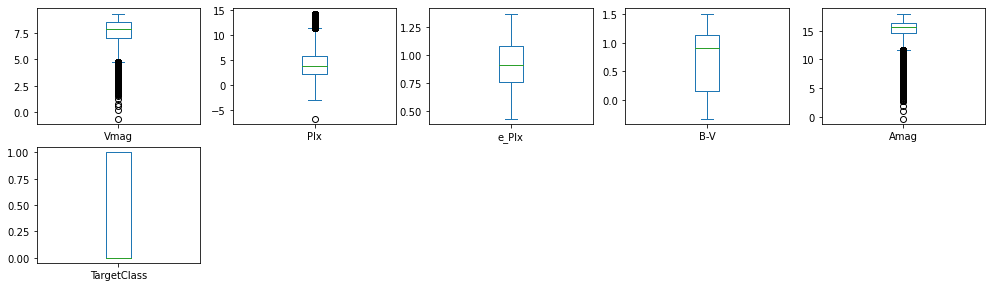

In [43]:
star.plot(kind='box', subplots=True, layout=(8,5), figsize=(17,20))

In [44]:
#converting data types

SpType_le = LabelEncoder()  
star['SpType'] = SpType_le.fit_transform(star["SpType"])
       

In [45]:
#splitting data

inputs = star.drop("TargetClass", axis = 1).values
target = star['TargetClass'].values

train_inputs, test_inputs , train_target, test_target = train_test_split(inputs,target , test_size= 0.3 , random_state=42)

In [46]:
train_inputs.shape


(16305, 6)

In [47]:
model_accuracy={}


In [48]:
def rmse(inputs, target):
    rmse=mean_squared_error(inputs, target, squared=False)
    return rmse

# Logistic Regression

In [135]:
#Fitting model

logreg = LogisticRegression(solver='liblinear')
logreg.fit(train_inputs,train_target)

LogisticRegression(solver='liblinear')

In [136]:
logreg.score(train_inputs,train_target)

0.8526832260042931

In [51]:
train_pred=logreg.predict(train_inputs)

In [52]:
rmse(train_pred,train_target)

0.3838186733285743

In [53]:
logreg.score(test_inputs,test_target)

0.8579195879238803

In [54]:
model_accuracy['Logistic Regression Before Tuning']=round((logreg.score(test_inputs,test_target))*100,2)

In [55]:
model_accuracy

{'Logistic Regression Before Tuning': 85.79}

In [56]:
accuracy_score(train_pred,train_target)

0.8526832260042931

In [57]:
test_pred=logreg.predict(test_inputs)

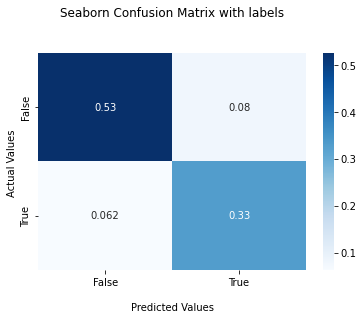

In [58]:

cf_matrix=confusion_matrix(test_target,test_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Tuning Hyper Parameters of Logistic Regression

In [59]:
logreg1 = LogisticRegression(solver='liblinear', penalty= 'l1')
logreg1.fit(train_inputs,train_target)

LogisticRegression(penalty='l1', solver='liblinear')

In [60]:
logreg1.score(train_inputs,train_target)

0.8524379024839006

In [61]:
logreg1.score(test_inputs,test_target)

0.8582057518958364

In [62]:
model_accuracy['Logistic Regression After Tuning']=round((logreg1.score(test_inputs,test_target))*100,2)

In [63]:
model_accuracy

{'Logistic Regression Before Tuning': 85.79,
 'Logistic Regression After Tuning': 85.82}

In [64]:
test_pred1=logreg1.predict(test_inputs)

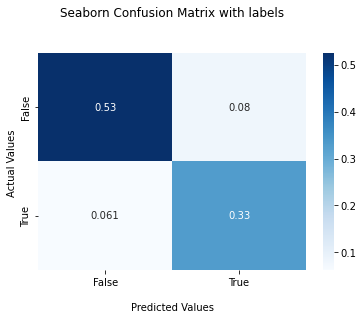

In [65]:
cf_matrix1=confusion_matrix(test_target,test_pred1)
ax = sns.heatmap(cf_matrix1/np.sum(cf_matrix1), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [66]:
logreg2 = LogisticRegression(solver='saga', penalty= 'elasticnet', l1_ratio=0.5)
logreg2.fit(train_inputs,train_target)

D:\Astro-Pro\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

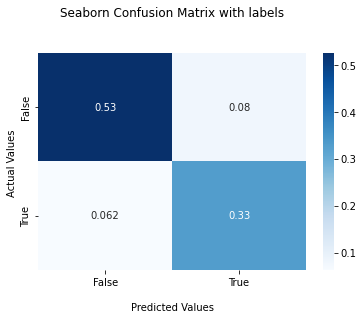

In [67]:
cf_matrix2=confusion_matrix(test_target,test_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [68]:
logreg2.score(train_inputs,train_target)

0.8249003373198406

In [69]:
logreg2.score(test_inputs,test_target)

0.8231506653312348

In [70]:
test_pred2=logreg2.predict(test_inputs)

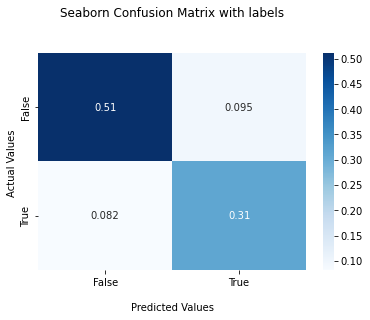

In [71]:
cf_matrix2=confusion_matrix(test_target,test_pred2)
ax = sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_target)
    train_acc =model.score(train_inputs, train_target)
    test_acc =model.score(test_inputs, test_target)
    return train_acc, test_acc

In [74]:
def test_param_and_plot(param_name, param_values):
    train_accs, test_accs = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_acc, test_acc = test_params(**params)
        train_accs.append(train_acc)
        test_accs.append(test_acc)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_accs, 'b-o')
    plt.plot(param_values, test_accs, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Testing'])

In [75]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

In [76]:
rf_model.fit(train_inputs,train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [77]:
rf_model.score(train_inputs,train_target)

1.0

In [78]:
rf_model.score(test_inputs,test_target)

0.9072828730862784

In [79]:
model_accuracy['RandomForestClassifier Before Tuning']=round((rf_model.score(test_inputs,test_target))*100,2)

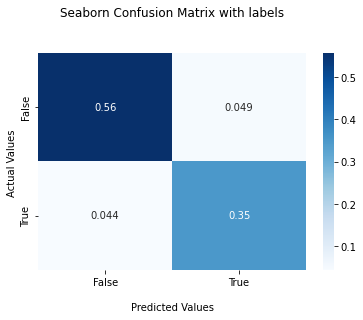

In [80]:
rf_model_pred=rf_model.predict(test_inputs)

rf_cf_matrix=confusion_matrix(test_target,rf_model_pred)
ax = sns.heatmap(rf_cf_matrix/np.sum(rf_cf_matrix), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [81]:
train_inputs_df=pd.DataFrame(train_inputs, columns=['Vmag', 'Plx', 'e_Plx', 'B-V', 'SpType', 'Amag'])

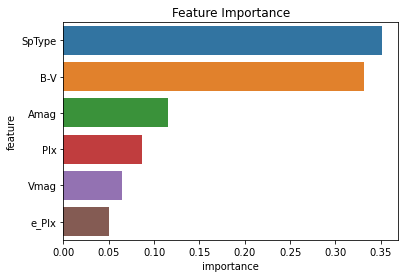

In [82]:
importance_df = pd.DataFrame({
    'feature': train_inputs_df.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

# Hyper Parameters Tuning of RandomForest Classifier

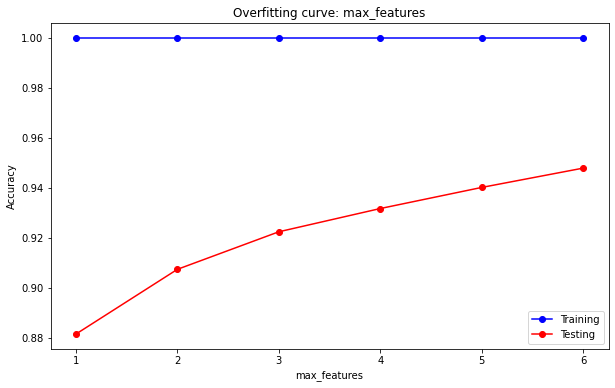

In [83]:
test_param_and_plot('max_features', [1,2,3,4,5,6])

In [84]:
test_params(max_features=5)

(1.0, 0.9400486478752325)

In [85]:
test_params(max_features=6)

(1.0, 0.9477750751180426)

max_features parameter can be fixed at 6 as it gives higer accuracy

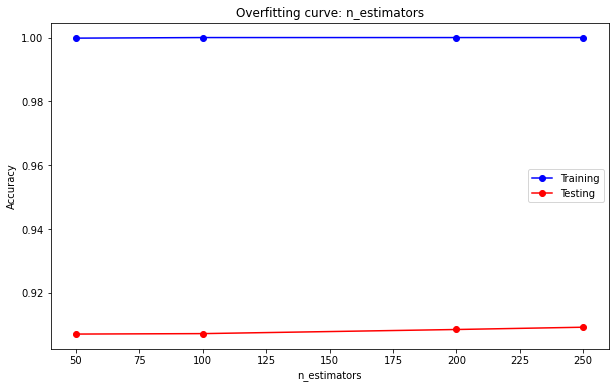

In [86]:
test_param_and_plot('n_estimators', [50,100,200,250])

In [87]:
test_params(n_estimators=100)

(1.0, 0.9072828730862784)

n_estimators parameter can be fixed at 100 as it gives higer accuracy

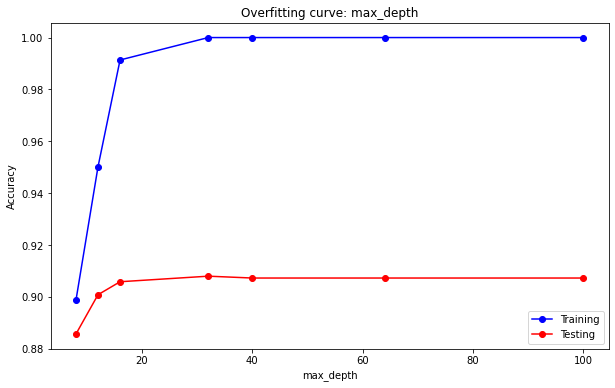

In [88]:
test_param_and_plot('max_depth', [8,12,16,32,40,64,100])

In [89]:
test_params(max_depth=36)

(1.0, 0.9072828730862784)

In [90]:
test_params(max_depth=100)

(1.0, 0.9072828730862784)

max_depth parameter can be fixed at 36 as it gives higer accuracy

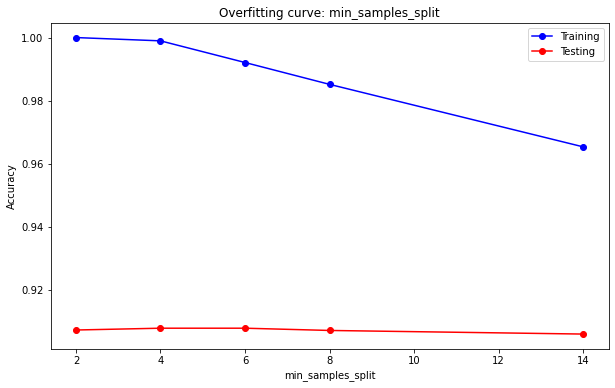

In [91]:
test_param_and_plot('min_samples_split', [2,4,6,8,14])

In [92]:
test_params(min_samples_split=2)

(1.0, 0.9072828730862784)

In [93]:
test_params(min_samples_split=4)

(0.9989573750383318, 0.9078552010301904)

min_samples_split parameter can be fixed at 2 as it gives higer accuracy

In [94]:
#final model after hyper parameter tuning

rf_model_final=RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, max_depth=36, min_samples_split=2, max_features=6)
rf_model_final.fit(train_inputs,train_target)
rf_model_final.score(train_inputs, train_target)

1.0

In [95]:
rf_model_final.score(test_inputs,test_target)

0.9476319931320647

In [96]:
model_accuracy['RandomForestClassifier After Tuning']=round((rf_model_final.score(test_inputs,test_target))*100,2)

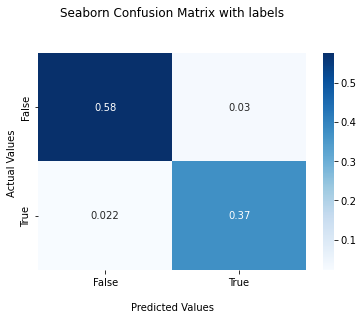

In [97]:
rf_model_pred2=rf_model_final.predict(test_inputs)

rf_cf_matrix2=confusion_matrix(test_target,rf_model_pred2)
ax = sns.heatmap(rf_cf_matrix2/np.sum(rf_cf_matrix2), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Gradient Boosting Machines with XGBoost

In [98]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [99]:
from xgboost import XGBClassifier

In [100]:
xgb_model=XGBClassifier(learning_rate=0.1)

In [101]:
xgb_model.fit(train_inputs,train_target)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [102]:
xgb_model.score(train_inputs,train_target)

0.9673719717877951

In [103]:
xgb_model.score(test_inputs,test_target)

0.9510659607955358

In [104]:
model_accuracy['XGBCLassifier Before Tuning']=round((xgb_model.score(test_inputs,test_target))*100,2)

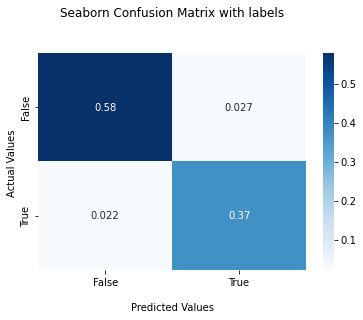

In [105]:
xgb_model_pred=xgb_model.predict(test_inputs)

xgb_model_pred=xgb_model.predict(test_inputs)

xgb_cf_matrix=confusion_matrix(test_target,xgb_model_pred)
ax = sns.heatmap(xgb_cf_matrix/np.sum(xgb_cf_matrix), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Hyper Parameter Tuning of XGBClassifier

In [106]:
def test_param(**params):
    model = XGBClassifier(random_state=42,n_jobs=-1, **params).fit(train_inputs, train_target)
    train_acc =model.score(train_inputs, train_target)
    test_acc =model.score(test_inputs, test_target)
    return train_acc, test_acc

In [107]:
def test_param_and_plot(param_name, param_values):
    train_accs, test_accs = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_acc, test_acc = test_param(**params)
        train_accs.append(train_acc)
        test_accs.append(test_acc)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_accs, 'b-o')
    plt.plot(param_values, test_accs, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Testing'])

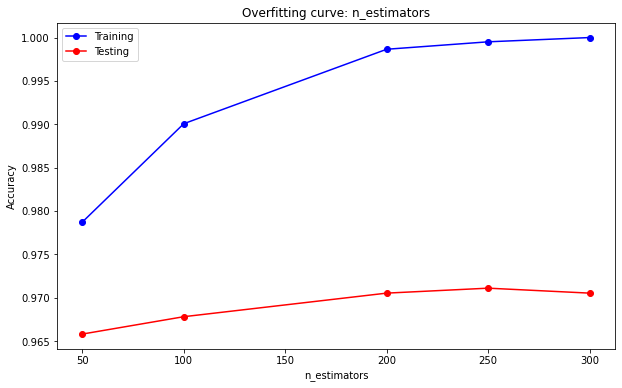

In [108]:
test_param_and_plot('n_estimators', [50,100,200,250,300])

In [109]:
test_params(n_estimators=200)

(1.0, 0.9085706109600801)

In [110]:
test_params(n_estimators=150)

(1.0, 0.9072828730862784)

In [111]:
test_params(n_estimators=250)

(1.0, 0.9092860208899699)

n_estimators parameter can be fixed a 250 as it gives a higher accuracy 

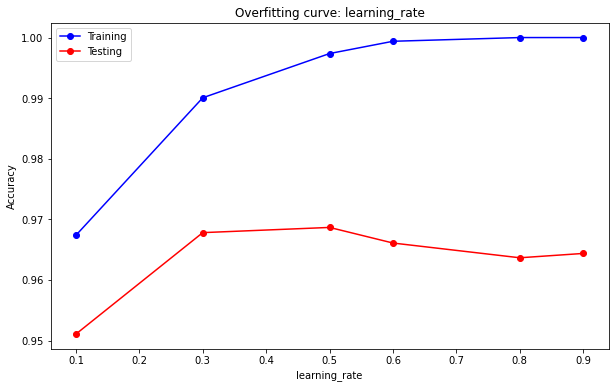

In [112]:
test_param_and_plot('learning_rate', [0.1,0.3,0.5,0.6,0.8,0.9])

In [113]:
test_param(learning_rate=0.5)

(0.9973627721557804, 0.9686650450708256)

In [114]:
test_param(learning_rate=0.7)

(0.9996933455995094, 0.9679496351409358)

In [115]:
test_param(learning_rate=0.4)

(0.9956455075130328, 0.9646587494634425)

learning_rate parameter can be fixed at 0.4 as it gives a higher accuracy 

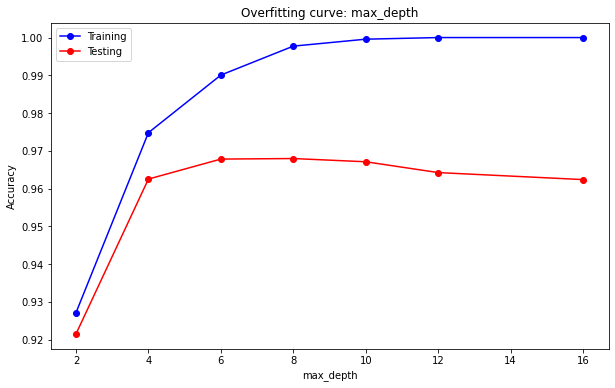

In [116]:
test_param_and_plot('max_depth', [2,4,6,8,10,12,16])

In [117]:
test_param(max_depth=8)

(0.9977307574363692, 0.9679496351409358)

In [118]:
test_param(max_depth=7)

(0.9942348972707759, 0.9680927171269137)

In [119]:
test_param(max_depth=9)

(0.9993253603189206, 0.9652310774073544)

max_depth parameter can be fixed at 8 as it gives a higher accuracy 

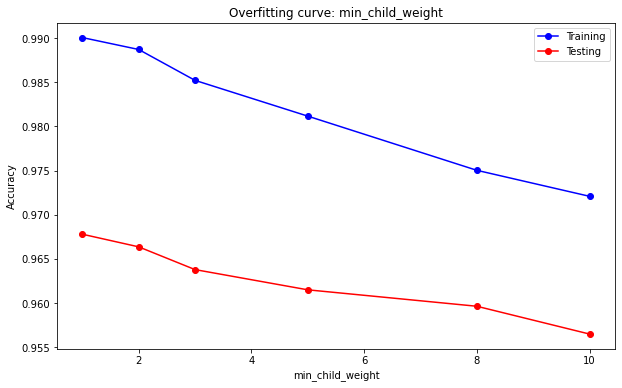

In [120]:
test_param_and_plot('min_child_weight',[1,2,3,5,8,10])

In [121]:
test_param(min_child_weight=2)

(0.9887151180619442, 0.9663757332951781)

In [122]:
test_param(min_child_weight=1)

(0.990064397424103, 0.9678065531549578)

In [123]:
test_param(min_child_weight=3)

(0.9852192578963508, 0.9638002575475748)

min_child_weight parameter can be fixed at 2 as it gives a higher accuracy 

In [124]:
xgb_final=XGBClassifier(random_state=42, n_estimators=250, learning_rate=0.5,max_depth=8, min_child_weight=2)
xgb_final.fit(train_inputs,train_target)
xgb_final.score(train_inputs,train_target)

1.0

In [125]:
xgb_final.score(test_inputs,test_target)

0.9635140935756188

In [126]:
model_accuracy['XGBCLassifier After Tuning']=round((xgb_final.score(test_inputs,test_target))*100,2)

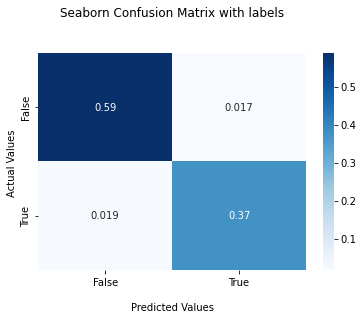

In [127]:
xgb_final_pred=xgb_final.predict(test_inputs)

xgb_final_pred=xgb_final.predict(test_inputs)

xgb_cf_matrix2=confusion_matrix(test_target,xgb_final_pred)
ax = sns.heatmap(xgb_cf_matrix2/np.sum(xgb_cf_matrix2), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Model Comparison

In [128]:
model_accuracy_={'Model':list(model_accuracy.keys()),'Accuracy':list(model_accuracy.values())}
model_accuracy_

{'Model': ['Logistic Regression Before Tuning',
  'Logistic Regression After Tuning',
  'RandomForestClassifier Before Tuning',
  'RandomForestClassifier After Tuning',
  'XGBCLassifier Before Tuning',
  'XGBCLassifier After Tuning'],
 'Accuracy': [85.79, 85.82, 90.73, 94.76, 95.11, 96.35]}

In [129]:
accuracy = pd.DataFrame.from_dict(model_accuracy_)
accuracy

,Model,Accuracy
0,Logistic Regression Before Tuning,85.79
1,Logistic Regression After Tuning,85.82
2,RandomForestClassifier Before Tuning,90.73
3,RandomForestClassifier After Tuning,94.76
4,XGBCLassifier Before Tuning,95.11
5,XGBCLassifier After Tuning,96.35


#### From the initial models and the final ones after tuning hyperparameters we find that XGB Classifier after tuning gave the highest accuracy.

# Summary

With the given dataset, first we cleaned the data, removed unwanted columns, dropped missing data rows and balanced data. All these steps come under preprocessing data. This helps us set up the stage to apply the models for classification.

For classification, we use three different types of models: Logistic Regression, Random FOrest Classifier, XGBClassifier. By recognizing import hyper parameters, we tuned the parameters, and found the model with higher accuracy.

# Future Work

The best model's accuracy is pretty good for a classification. We can try same classification processes to a bigger dataset of stellar classification or a more challenging problem with more features .

# References

* JOVIAN COURSES
* TOP PROJECTS LISTED IN THE JOVIAN COURSE PAGE
* KAGGLE COURSES

In [130]:
pip install jovian --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [131]:
import jovian

In [132]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Error: The current API key is invalid or expired.


[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Updating notebook "ee190002042/jovian-ml-project" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/ee190002042/jovian-ml-project


'https://jovian.ai/ee190002042/jovian-ml-project'